# Описание задания

В этом задании мы рассмотрим пример применения зловредного обучения. На первом этапе мы обучим модель на основе логистической регрессии классифицировать изображения в зависимости от того, что изображено. Далее мы будем моделировать различные атаки и анализировать то, насколько хуже модель стала справляться со своей задачей.

## Установка библиотеки Adversarial Robustness Toolbox (ART)

Библиотека предназначена для решения задач информационной безопасности и машинного обучения. ART предоставляет инструменты, которые позволяют разработчикам и исследователям защищать и оценивать модели и приложения машинного обучения от враждебных угроз: Evasion, Poisoning, Extraction и Inference.

In [ ]:
!pip install -q adversarial-robustness-toolbox

## Иморт библиотек и подготовка данных

Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ProjectedGradientDescent
from art.utils import load_mnist

import warnings
warnings.simplefilter('ignore')

В качестве данных будем использовать датасет `MNIST`.

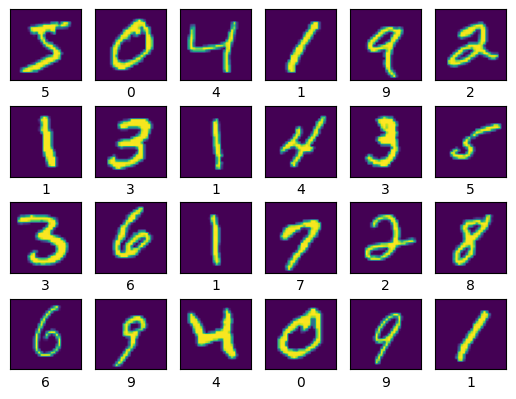

In [ ]:
(x_train, y_train), (__, __), min_, max_ = load_mnist()

n_samples_train = x_train.shape[0]
n_features_train = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
x_train = x_train.reshape(n_samples_train, n_features_train)
y_train = np.argmax(y_train, axis=1)

n_samples_max = 1000

X = x_train[0:n_samples_max]
y = y_train[0:n_samples_max]

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28,28))
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y_train[i])

## Построение и оценка модели

При помощи <code>train_test_split()</code> разделите набор данных на тренировочный и тестовый с параметрами, указанными в вашем индивидуальном задании. Используйте стратификацию метке класса.

In [ ]:
# <ENTER YOUR CODE HERE>

Постройте гистограмму распределения объектов по классам в тренировочном наборе данных. Убедитесь, что классы сбалансированы. Вычислите долю элементов класса, указанного в вашем индивидуальном задании.

In [ ]:
# <ENTER YOUR CODE HERE>

Обучите модель <code>LogisticRegression()</code> на тренировочном наборе данных с параметрами, указанными в вашем индивидуальном задании.

In [ ]:
# <ENTER YOUR CODE HERE>

Оцените модель на тестовых данных. Вычислите <code>f1_score(average='weighted')</code>

In [ ]:
# <ENTER YOUR CODE HERE>

# Атака при помощи PGD (Projected Gradient Descent)

Реализуем атаку при помощи Projected Gradient Descent. Создайте переменную `art_classifier` и поместите в нее экземпляр класса [`SklearnClassifier`](https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/estimators/classification_scikitlearn.html) из библиотеки ART, где в качестве параметра `model` укажите ранее обученную модель логистической регрессии из задания выше.

In [ ]:
# <ENTER YOUR CODE HERE>

При помощи `ProjectedGradientDescent()` из библиотеки ART создайте генератор искаженных данных с параметрами, указанными в вашем индивидуальном задании. В качестве параметра `estimator` используйте объект, который находится в переменной `art_classifier` из предыдущей ячейки.

In [ ]:
# <ENTER YOUR CODE HERE>

При помощи метода `.generate()` сгенерируйте искаженные тестовые данные.

In [ ]:
# <ENTER YOUR CODE HERE>

Постройте пару изображений (оригинальное и искаженное) из тестовых данных с индексом, указанным в вашем индивидуальном задании, сравните результаты. Заметно ли искажение человеческому глазу?

In [ ]:
img_num =

# Создание фигуры и осей
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 ряд, 2 колонки

# Отображение первого изображения
ax[0].imshow(x_test[img_num, :].reshape((28, 28)))
ax[0].axis('off')  # Отключение осей для первого изображения
ax[0].set_title('Оригинальное изображение')  # Заголовок для первого изображения

# Отображение второго изображения
ax[1].imshow(x_test_adv[img_num, :].reshape((28, 28)))
ax[1].axis('off')  # Отключение осей для второго изображения
ax[1].set_title('Искаженное изображение')  # Заголовок для второго изображения

# Показать график
plt.tight_layout()  # Для улучшения компоновки
plt.show()

Определите, какую метку класса для объекта тестовых данных с индексом, указанным в вашем индивидуальном задании, предсказала модель в случае оригинальных и искаженных данных.

In [ ]:
# <ENTER YOUR CODE HERE>

Оцените модель на искаженных тестовых данных. Вычислите <code>f1_score(average='weighted')</code>

In [ ]:
# <ENTER YOUR CODE HERE>